In [111]:
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Activation ,Flatten,GlobalAveragePooling2D
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.applications import imagenet_utils
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from keras.optimizers import Adam
from sklearn.utils import shuffle

from keras.preprocessing import image as ki
from PIL import Image as im
import os

In [112]:
def get_processed_images(image_dir):
    size = (224,224)
    normalized_image = []
    imgV=None
    print('images length',len(os.listdir(image_dir)))
    for pic in os.listdir(image_dir):
        try:
            img = im.open(image_dir+'\\'+pic)
            img =img.resize(size,im.ANTIALIAS) 
            img_array = ki.img_to_array(img)
            v_min = img_array.min(axis=(0, 1), keepdims=True)
            v_max = img_array.max(axis=(0, 1), keepdims=True)
            img_array = (img_array - v_min)/(v_max - v_min)
            normalized_image.append(img_array)
            filterImage = filter(lambda x : x.shape[2]==3 ,normalized_image)
            imgV = np.array(list(filterImage))
        except  Exception as e:
            print('exception'+str(e))
            pass
    return imgV

In [134]:
from sklearn.model_selection import train_test_split
invoiceData = get_processed_images(r"images\invoice")
print(len(invoiceData))
adharData= get_processed_images(r"images\aadhar_card")

image_data = np.concatenate([invoiceData,adharData])

images length 178
178
images length 167


IndexError: index 178 is out of bounds for axis 0 with size 178

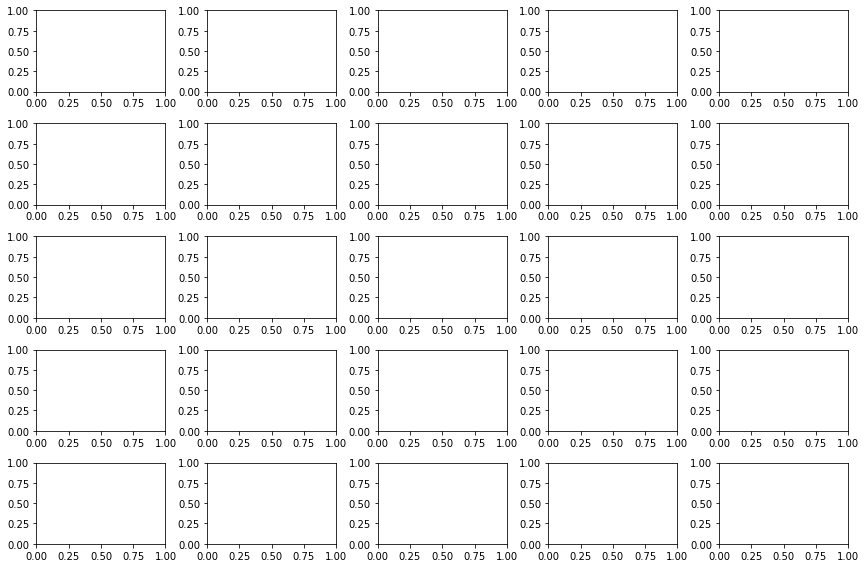

In [228]:
adhar_labels=np.zeros((len(adharData),)) # ALL THE ZEROES ARE NON INVOICE/ ADHAR DATA 
invoice_labels = np.ones((len(invoiceData),)) #ALL THE ONES ARE INVOICE DATA
Y= np.concatenate([invoice_labels,adhar_labels])
Y = np_utils.to_categorical(Y, 2)
showData(invoiceData,True)

In [173]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x= Dense(128,activation='relu',name='fc1')(x)
x= Dense(128,activation='relu',name='fc2',kernel_regularizer=regularizers.l2(0.01))(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [174]:
custom_model=Model(inputs=base_model.input,outputs=preds)

In [175]:
for layer in custom_model.layers[:-3]:
    layer.trainable=False
for layer in custom_model.layers[-3:]:
    layer.trainable=True
custom_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
custom_model.summary()
# for i,layer in enumerate(custom_model.layers):
#     print(i,layer.name,layer.trainable)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [176]:
hist = custom_model.fit(X_train, y_train, batch_size=32, epochs=9, verbose=1, validation_data=(X_test, y_test))


Train on 303 samples, validate on 42 samples
Epoch 1/9
303/303 [==============================] - 90s 298ms/step - loss: 2.0407 - acc: 0.7360 - val_loss: 1.4617 - val_acc: 0.8333
Epoch 2/9
303/303 [==============================] - 69s 229ms/step - loss: 1.2398 - acc: 0.9175 - val_loss: 1.3564 - val_acc: 0.8095
Epoch 3/9
303/303 [==============================] - 69s 229ms/step - loss: 1.0481 - acc: 0.9439 - val_loss: 1.0567 - val_acc: 0.9524
Epoch 4/9
303/303 [==============================] - 68s 225ms/step - loss: 1.0362 - acc: 0.9010 - val_loss: 1.3268 - val_acc: 0.7619
Epoch 5/9
303/303 [==============================] - 68s 224ms/step - loss: 0.8526 - acc: 0.9472 - val_loss: 1.8394 - val_acc: 0.7381
Epoch 6/9
303/303 [==============================] - 70s 230ms/step - loss: 0.8556 - acc: 0.9307 - val_loss: 1.2256 - val_acc: 0.7381
Epoch 7/9
303/303 [==============================] - 70s 231ms/step - loss: 0.6196 - acc: 0.9868 - val_loss: 0.8925 - val_acc: 0.8571
Epoch 8/9
303/303

In [198]:
size=(224,224)
img =  im.open('adhar_card.JPG')
img = img.resize(size,im.ANTIALIAS) 
image_to_predict  = ki.img_to_array(img)
image_to_predict = np.expand_dims(image_to_predict,axis=0)
image_to_predict = image_to_predict[:,:,:,:3]

In [227]:
def showData(data,is_invoice):
    INDEX = 0
    if is_invoice:
        INDEX = len(invoiceData)
    else :
        INDEX= len(imageData)-len(invoiceData)
    col_size= 5
    row_size= 5
    ig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
    plt.tight_layout()
    i=0
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(data[INDEX-i])
            ax[row][col].set_title(Y[INDEX-i])
            print(INDEX-i)
            i+=1


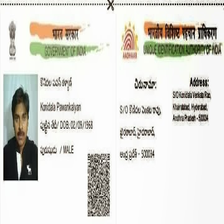

In [186]:
ki.array_to_img(img)